# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 3. Prediction with Multiple Logistic Regression

In this section we use the feature matrices and response vectors with features selected in chapter 2.  

#### We use two different versions (created in chapter 1, features-selected in chapter 2):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####  

In [3]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use("seaborn-whitegrid")
%matplotlib inline

## 3.0. Choose which Feature Matrix (Version 1 or 2) you want to load in by choosing the Case



#### 1) Choose the Dataset Version you want
VERSION = 1; Feature Matrix with only ratios                                  
VERSION = 2;  Feature Matrix with ratios + saisonality + other market data


In [4]:
### Chose which dataset version you want the selection of features and the prediction to be based on 
_VERSION_ = 2
"""
INSERT NUMBER 1 or 2
"""


# Define sel_state variable for easier printing out    
if _VERSION_ == 1:
    sel_version = 'Based on Dataset with only the Ratios Dataset as predicive Features'
elif _VERSION_ == 2:
    sel_version = 'Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features'
else: raise ValueError('_VALUE_ must be either 1 or 2')

#### 2) Choose with which method you want to have the features been pre-selected
SELECTON  = RF ; Features pre-selected with Random Forest Classifier                                                           
SELECTION = PCA; Features pre-selected with Principal Component Analysis (PCA)

In [5]:
### Choose whether you want the datasets with features selected with RF or PCA
_SELECTION_ = 'RF'
"""
INSERT 'RF' OR 'PCA'
"""


# Define sel_state variable for easier printing out    
if _SELECTION_ == 'RF':
    sel_feat = 'Random Forest (RF)'
elif _SELECTION_ == 'PCA':
    sel_feat = 'Principal Component Analysis (PCA)'
else: raise ValueError('_SELECTION_ must be either RF or PCA')

## 3.1. Preparation

### 3.1.1. Import the Response Vector and the Feature Matrix

In [6]:
# import Data (already splitted to train/test-data and selected features-> bc_randomforest_feature_selection)
if _VERSION_ == 1:
    if _SELECTION_ == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X1_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y1_test_f.csv', sep=',', header=0)
    elif _SELECTION_ == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X1_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y1_test_p.csv', sep=',', header=0)
elif _VERSION_ == 2:
    if _SELECTION_ == 'RF':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_train_f.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/X2_test_f.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_train_f.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_randomforest/y2_test_f.csv', sep=',', header=0)
    elif _SELECTION_ == 'PCA':
        X_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_train_p.csv', sep=',', header=0)
        X_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/X2_test_p.csv', sep=',', header=0)
        y_train_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_train_p.csv', sep=',', header=0)
        y_test_s = pd.read_csv('Data/generated_splits/features_selected_pca/y2_test_p.csv', sep=',', header=0)
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')   


### 3.1.2. Print out Shape and Form of Feature Matrix and Response Vector

### Train Set

In [5]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))

print("")
print('Shape (rows, columns) of Feature Matrix X (Train) ' + '=' + str(X_train_s.shape))
print("")

print('Feature Matrix X (Train) with Selected Features')
display(X_train_s[0:3])
print("")

print('Response Vector y (Train) after Feature Selection')
display(y_train_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 2; Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features

Shape (rows, columns) of Feature Matrix X (Train) =(2836, 15)

Feature Matrix X (Train) with Selected Features


,RET,RETX,sprtrn,ewretx,vwretx,ewretd,pe_inc,pe_op_dil,ALTPRC,debt_ebitda,cash_ratio,ps,SHRENDDT,VOL,int_debt
0,0.024042,0.024042,0.037655,0.032156,0.038183,0.033697,18.484,15.633,29.39,1.704,1.4810,3.703,20140929.0,4611190.0,0.045
1,-0.057168,-0.066454,-0.014999,-0.015631,-0.017055,-0.013012,39.232,17.296,32.17,3.055,0.3210,0.689,20130730.0,1296447.0,0.070
2,0.026373,0.026373,0.043117,0.042687,0.043937,0.044257,13.062,9.209,56.82,8.714,0.4785,2.034,20140330.0,3473222.0,0.052



Response Vector y (Train) after Feature Selection


,0
0,1
1,0
2,1


### Test Set

In [7]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))

print("")
print('Shape (rows, columns) of Feature Matrix X (Test) ' + '=' + str(X_test_s.shape))
print("")

print('Feature Matrix X (Train) with Selected Features')
display(X_test_s[0:3])
print("")

print('Response Vector y (Test) after Feature Selection')
display(y_test_s[0:3])
print("")

Features Selected with Random Forest (RF)
Version 2; Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features

Shape (rows, columns) of Feature Matrix X (Test) =(710, 15)

Feature Matrix X (Train) with Selected Features


,RET,RETX,sprtrn,ewretx,vwretx,ewretd,pe_inc,pe_op_dil,ALTPRC,debt_ebitda,cash_ratio,ps,SHRENDDT,VOL,int_debt
0,-0.017073,-0.017073,-0.015514,-0.046891,-0.026823,-0.044988,16.224,16.224,100.75,0.346,0.859,3.318,20141009.0,15283673.0,0.018
1,0.050202,0.050202,0.029749,0.049754,0.035682,0.051828,18.555,16.489,75.52,6.228,0.399,2.379,20131030.0,746229.0,0.018
2,0.025838,0.025838,-0.036974,-0.012292,-0.038109,-0.011388,15.550,9.520,18.66,1.467,1.592,3.293,20100225.0,10148052.0,0.038



Response Vector y (Test) after Feature Selection


,0
0,0
1,1
2,1


## 3.2. Simple Logistic Regression (statsmodels) (SLM)

### 3.2.1. Preparation and fitting (on Training Set) , define BEST FEATURE (SLM)

In [7]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")

# Run Simple Logistic Regression
# Logistic Regression (with the most important feature from feature selection)
# Assign "best_feature" to matrix X and response to y, acording to chosen Version of datasets and feature Selection method
if _VERSION_ == 1:
    if _SELECTION_ == 'RF':
        best_feature = 'CAPEI'
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[[best_feature]])).fit()
    elif _SELECTION_ == 'PCA':
        best_feature = None
        print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
elif _VERSION_ == 2:
    if _SELECTION_ == 'RF':
        best_feature = 'RET'
        logReg = sm.Logit(endog = y_train_s, exog= sm.add_constant(X_train_s[[best_feature]])).fit()
    elif _SELECTION_ == 'PCA':
        best_feature = None
        print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')
print("")

Features Selected with Random Forest (RF)
Version 2; Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features

Optimization terminated successfully.
         Current function value: 0.057065
         Iterations 13



In [8]:
# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### 3.2.2. Summary (SLM)

In [9]:
# LogReg with only one feature as exogen variable
if _SELECTION_ == 'RF':
    print(logReg.summary())
    print("")
    print('logReg pvalues: ')
    print("")
    print(logReg.pvalues)
elif _SELECTION_ == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                 2836
Model:                          Logit   Df Residuals:                     2834
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Apr 2018   Pseudo R-squ.:                  0.9168
Time:                        21:29:31   Log-Likelihood:                -161.84
converged:                       True   LL-Null:                       -1945.8
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9371      0.163     -5.738      0.000      -1.257      -0.617
RET          392.1753     29.763     13.177      0.000     333.842     450.509

Possibly complete quasi-separation: A fraction 0.68

### 3.2.3. Assessing Output (SLM)

### Hypothesis testing / Confidence Interval

In [10]:
significance_level = 0.01

if _SELECTION_ == 'RF':
    print("")
    print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
          + str(int(significance_level*100)) + '%)')
    logReg.conf_int(alpha=significance_level)
elif _SELECTION_ == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')


99% Confidence Interval (Significance Level 1%)


### Confusion Matrix

In [11]:
if _SELECTION_ == 'RF':
    logReg.pred_table(threshold=0.5)
elif _SELECTION_ == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')


### 3.2.2. Prediction (SML)

### A: In-sample Prediction of probability for returns going UP in the next period (predict y_train)


#### For whole Training Set

In [12]:
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")

# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for the whole test set
if _SELECTION_ == 'RF':
    pred_train_all = logReg.predict(sm.add_constant(X_train_s[best_feature]))
    print('Predicted probability of price going UP for whole Feature Train Set is: ')
    display(pred_train_all.head(3))
    display(y_train_s.head(3))
elif _SELECTION_ == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')

Features Selected with Random Forest (RF)
Version 2; Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features

Predicted probability of price going UP for whole Feature Train Set is: 


0    9.997948e-01
1    7.180963e-11
2    9.999178e-01
dtype: float64

,0
0,1
1,0
2,1


### B: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For chosen value of predictive variable


In [13]:
# X must include 1 in first column for intercept
# we wish to get the probability of 'UP' (=1) for a best_feature_value of USD 15

# Print Text
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")
print('Chosen best feature = ' + str(best_feature))

# Loop for Version differenciation
if _VERSION_ == 1:
    if _SELECTION_ == 'RF':
        best_feature_value = 15
        print('Chosen value of best feature = ' + str(best_feature_value))
        print("")
        pred_test_one = logReg.predict([1, best_feature_value])
        ratio_response_train = y_train_s.sum() / y_train_s.size
        print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
              + str("%.4f" % round(float(pred_test_one*100),4)) + '%')
        print('Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
    elif _SELECTION_ == 'PCA':
        print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')  
elif _VERSION_ == 2:
        if _SELECTION_ == 'RF':
            best_feature_value = 0.02
            print('Chosen value of best feature = ' + str(best_feature_value))
            print("")
            pred_test_one = logReg.predict([1, best_feature_value])
            ratio_response_train = y_train_s.sum() / y_train_s.size
            print('Predicted probability of price going UP with chosen ' + str(best_feature) + ' value is: '
                  + str("%.4f" % round(float(pred_test_one*100),4)) + '%')
            print('Ratio of "UP" (Train)  =  ' + str("%.4f" % round(float(ratio_response_train*100),4)) + '%')
        elif _SELECTION_ == 'PCA':
            print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')


Features Selected with Random Forest (RF)
Version 2; Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features

Chosen best feature = RET
Chosen value of best feature = 0.02

Predicted probability of price going UP with chosen RET value is: 99.9000%
Ratio of "UP" (Train)  =  55.9238%


#### For whole Test Set

In [14]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")

# we wish to get the probability of 'UP' (=1) for the whole test set
if _SELECTION_ == 'RF':
    pred_test_all = logReg.predict(sm.add_constant(X_test_s[[best_feature]]))
    print("")
    print('Predicted probability of price going UP for whole Feature Test Set is: ')
    display(pred_test_all.head(3))
    display(y_test_s.head(3))
elif _SELECTION_ == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')    


Features Selected with Random Forest (RF)
Version 2; Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features


Predicted probability of price going UP for whole Feature Test Set is: 


0    0.000484
1    1.000000
2    0.999899
dtype: float64

,0
0,0
1,1
2,1


### 3.2.3. Plot Results (SLM)


Features Selected with Random Forest (RF)
Version 2; Based on Dataset with Ratios + Seasonality + other Market Data as predictive Features

Chosen best feature = RET



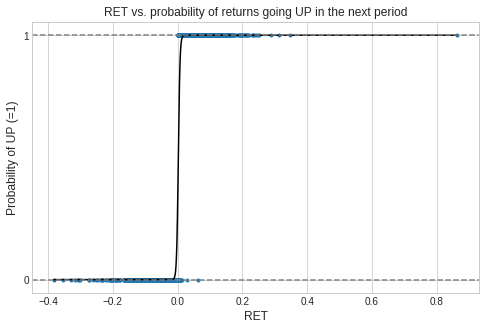

In [15]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")
print('Chosen best feature = ' + str(best_feature))
print("")

# Plot scatter and log.Reg
if _SELECTION_ == 'RF':
    
    # Transfer best_feature column an prediction for response vector in a newly made dataframe "res"
    res = pd.DataFrame()
    res['best_feature'] = X_train_s[best_feature]
    res['pred'] = logReg.predict()

    # Sort results by values of the best_feature column
    res = res.sort_values('best_feature')
    plt.figure(figsize =(8,5))
    plt.scatter(X_train_s[best_feature], y_train_s, marker ='.')
    plt.plot(res.best_feature, res.pred, c = 'k')
    plt.axhline(y=0, color = "gray", linestyle = "dashed")
    plt.axhline(y=1, color = "gray", linestyle = "dashed")
    plt.ylabel("Probability of UP (=1)", fontsize =12)
    plt.xlabel(str(best_feature), fontsize =12)
    plt.title(str(best_feature) + ' vs. probability of returns going UP in the next period');
    
elif _SELECTION_ == 'PCA':
    print('ERROR: PCA best feature not defined! Thus no Simple Regression possible.')
    
else: raise ValueError('_VERSION_ value must be either 1 or 2, _SELECTION_ must be either RF or PCA')  

## 3.3. Multiple Logistic Regression with n pre-selected features (MLR1)

### 3.3.1. Preparation and fitting (on Training Set) (MLR1)

In [34]:
def show_falses():
    for key, value in y_train_s():
        if y_train_s.loc[i] != 1 and y_train_s.loc[i] != 0: 
            return(y_train_s, key)
print()


NameError: name 'value' is not defined

In [16]:
## Multiple Log. Regression (with all n best features chosen in Chapter 2 in the feature selection process)
logReg_m = sm.Logit(endog = y_train_s, exog = sm.add_constant(X_train_s)).fit() 

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

### 3.3.2. Summary (MLR1)

In [ ]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")
print("Multiple Logistic Regression with all selected features")
print("")

# Workaround solution for error ("AttributeError: module 'scipy.stats' has no attribute 'chisqprob'")
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Run Multiple Logistic Regression
print(logReg_m.summary().tables[0])
print(logReg_m.summary().tables[1])

### 3.3.3. Assessing Output (MLR1)

### Hypothesis testing / Confidence Interval

In [ ]:
significance_level = 0.01

# Print Confidence Interval with Title
print("")
print(str(int(100 - significance_level*100)) + '% Confidence Interval (Significance Level ' 
      + str(int(significance_level*100)) + '%)')
display(logReg_m.conf_int(alpha=significance_level))

### Confusion Matrix

In [ ]:
logReg_m.pred_table(threshold=0.5)

### 3.3.4. Prediction (MLR1)
Multiple Logistic Regression 1 (pre-selected features with RandomForest in Chapter 2) 

### A: In-sample Prediction of probability for returns going UP in the next period (predict y_train)

#### For whole Training Set


In [ ]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")

# Get the probability of 'UP' (=1) for the whole training set
pred_train_all = logReg_m.predict(sm.add_constant(X_train_s))

# Print Prediction and Response Vector, with Title
print("")
print('Predicted probabilities of price going UP for whole Feature Set (Train) are: ')
display(pred_train_all[0:3])
print("")
print('Response Vector (Train): ')
display(y_train_s[0:3])

### B: New-sample Prediction of probability for returns going UP in the next period (predict y_test)

#### For whole Test Set


In [ ]:
print("")
print('Features Selected with ' + str(sel_feat))
print('Version ' + str(_VERSION_) + '; ' + str(sel_version))
print("")

# Get the probability of 'UP' (=1) for the whole test set
pred_test_all = logReg_m.predict(sm.add_constant(X_test_s))

# Print Prediction and Response Vector, with Title
print("")
print('Predicted probability of price going UP for whole Feature Set (Test) is: ')
display(pred_test_all.head(3))
print("")
print('Response Vector (Test): ')
display(y_test_s.head(3))

In [ ]:
# compare LogReg with only one feature as exogen variable & LogReg 1 
# (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

In [ ]:
# Check for non significant values (p-value > 0.05) and the Log-Likelihood value

## 3.4. Multiple Logistic Regression with only significant features (MLR2)

Apply an other multiple logistic regression on a transformed dataset with only all significant values from LogReg_m (above)

### 3.4.1. Extract significant features (MLR2)

In [ ]:
# extracting significant features with an alpha-boundery of 0.05

if _SELECTION_ == 'RF':
    sign_features = (X_train_s.columns.values[np.where(logReg_m.pvalues < 0.05)])
    print("")
    print('Features that were significant in the previous MLR in chapter 3.3.:')
    print("")
    print(list(sign_features))
elif _SELECTION_ == 'PCA':
    print('PCA: gives "IndexError: index 10 is out of bounds for axis 1 with size 10"')
else: raise ValueError('_SELECTION_ must be either RF or PCA')

### 3.4.2. Preparation and fitting (on Training Set) (MLR2)

In [ ]:
## Multiple Log. Regression (with significant features from logreg above)
# Assign features to X and response vector y
if _SELECTION_ == 'RF':
    logReg_mm = sm.Logit(endog = y_train_s, exog=sm.add_constant(X_train_s[sign_features])).fit()
elif _SELECTION_ == 'PCA':
    print('PCA: could not define sign_features above')
else: raise ValueError('_SELECTION_ must be either RF or PCA')

### 3.4.3. Summary (MLR2)

In [ ]:
if _SELECTION_ == 'RF':
    print("")
    print("Multiple Logistic Regression with selected significant features")
    print("")
    print(logReg_mm.summary().tables[0])
    print(logReg_mm.summary().tables[1])
elif _SELECTION_ == 'PCA':
    print('PCA: could not define sign_features above')
else: raise ValueError('_SELECTION_ must be either RF or PCA')

In [ ]:
# compare LogReg 1 & 2 (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

In [ ]:
# Does the logistic regression support our choice in feature selection (with random forest)?

# CODE DIRECTLY COPIED FROM STEFANIE FILE

### 2.2.2 Multiple Logistic Regression with all selected features (for dataset number 2, because error message)

In [ ]:
## Multiple Log. Regression (tried with all 15 features from feature selection, but it gives an error because it seems that
# there are dependent columns)
# Assign features to X and response vector y
#X = sm.add_constant(X2_train_s)
#y = y2_train

# check for all independent columns
import sympy 
reduced_form, inds = sympy.Matrix(X2_train_s.values).rref()
reduced_form

# independent columns
inds

# Assign features to X and response vector y-> because of inds only until column 14
X = sm.add_constant(X2_train_s.iloc[:, 0:14])
y = y2_train

In [ ]:
# LogReg A
print("Multiple Logistic Regression with all selected features")
print(78*"_")
print("")
# Run Log.Reg
logRegA = sm.Logit(endog = y, exog= X).fit()
print(logRegA.summary().tables[0])
print(logRegA.summary().tables[1])

In [ ]:
# compare LogReg with only one feature as exogen variable & LogReg A 
# (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))

# Check for non significant values (p-value > 0.05) and the Log-Likelihood value

### 2.2.3 Multiple Logistic Regression with only significant features (for dataset number 2, because error message)

In [ ]:
# extracting significant features with an alpha-boundery of 0.05
sign_features = (colNms_X2_train[np.where(logReg.pvalues < 0.05)])
print(sign_features)

### 2.2.3. Summary

In [ ]:
## Multiple Log. Regression (with significant features from logreg above)
# Assign features to X and response vector y
X = sm.add_constant(X2_train_s[sign_features])
y = y2_train
logReg = sm.Logit(endog = y, exog=X).fit()

# LogReg B
print("Multiple Logistic Regression with selected significant features")
print(78*"_")
print("")
print(logReg.summary().tables[0])
print(logReg.summary().tables[1])

In [ ]:
# compare LogReg A & B (explicitly Log-Likelihood values-> is there an improvement? (smaller values are prefered!))
# Does the logistic regression support our choice in feature selection (with random forest)?

## 3. Prediction

### 3.1 Version 1 with best LogReg Model

In [ ]:
modelA = LogisticRegression()
modelA.fit(X1_train_s, y1_train)

expected = y1_test
predicted = modelA.predict(X1_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)

### 3.2 Version 2 with best LogReg Model

In [ ]:
modelB = LogisticRegression()
modelB.fit(X2_train_s, y2_train)

expected = y2_test
predicted = modelB.predict(X2_test_s)

In [ ]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
# loglikelihood for "regression" of predicted on expected
from sklearn.metrics import log_loss

log_loss(expected, predicted)